In [134]:
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.append('{}/rotation/'.format(os.environ.get("HOME")))
sys.path.append('../src/')
from plot import *
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
dmt1_metadata = pd.read_csv('../data/p1_merge_metadata.csv', index_col=0)

dmt1_counts = io.mmread('../data/dmt1_counts.mtx')
aggs1_counts = io.mmread('../data/aggs1_counts.mtx')
gene_names = pd.read_csv('../data/VizgenLungHacohen/cells/genes.txt', header=None)

In [62]:
# Convert to Anndata object

adata = anndata.AnnData(X=dmt1_counts.transpose().tocsr())
dmt1_metadata.index = dmt1_metadata.index.astype('str')
adata.obs = dmt1_metadata
adata.var.index = gene_names[0]
adata.obsm['spatial'] = dmt1_metadata[['X', 'Y']]


In [69]:

find_gene_indices('LAMP3', adata)

array([289])

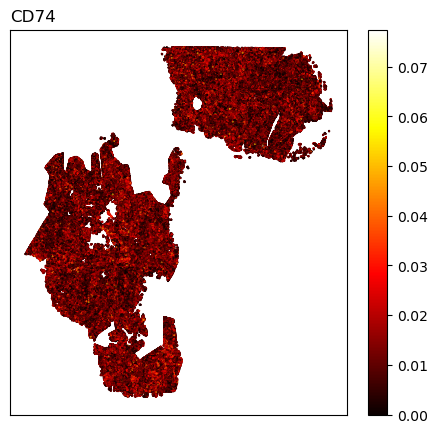

In [113]:

plot_genes(adata, genes_name=['CD74'], plot_mode='normalized', size=0.1, figsize=(25,5))


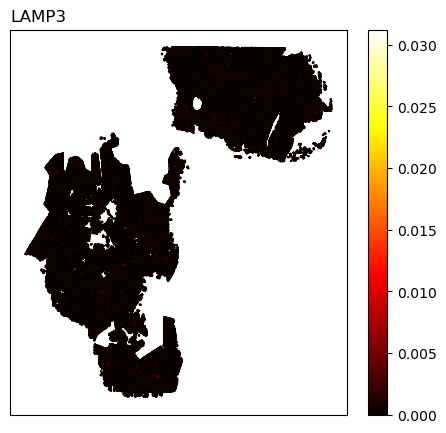

In [114]:
plot_genes(adata, genes_name=['LAMP3'], plot_mode='normalized', size=0.1, figsize=(25,5))

In [119]:
# Where are the LAMP3+ DC cells?
dc = dmt1_metadata[dmt1_metadata['type_lvl2'].isin(['LAMP3+CCL19+ mreg DC', 'LAMP3+CD1C+ DC', 'CD1C+ITGAX+ DC', 'FLT3+ DC'])]
dc


,ORIG_ID,X,Y,type_lvl1,type_lvl2,f,agg_id,spatial_cluster,hubID,hubType
327,622,7103.505127,1483.928650,Myeloid,CD1C+ITGAX+ DC,2.617525,44,0,H260,tumor
367,663,7118.639404,1378.061829,Myeloid,LAMP3+CD1C+ DC,1.046316,46,1,H260,tumor
427,876,7086.199463,4804.504150,Myeloid,CD1C+ITGAX+ DC,1.819293,60,0,H260,tumor
448,918,7119.408203,4918.617432,Myeloid,CD1C+ITGAX+ DC,1.784406,61,7,H260,tumor
470,944,7087.430908,4938.096680,Myeloid,LAMP3+CD1C+ DC,1.364274,69,7,H260,tumor
...,...,...,...,...,...,...,...,...,...,...
648825,642626,12457.325195,10456.551270,Myeloid,LAMP3+CCL19+ mreg DC,1.126155,10571,6,H853,hybrid_hub
648833,642643,12458.455566,10386.416016,Myeloid,LAMP3+CCL19+ mreg DC,1.246470,10566,6,H853,hybrid_hub
648834,642644,12458.346680,10448.699707,Myeloid,LAMP3+CCL19+ mreg DC,1.259065,10571,6,H853,hybrid_hub
648844,642656,12442.750977,10421.788574,Myeloid,LAMP3+CCL19+ mreg DC,2.130888,20932,6,H853,hybrid_hub


<Axes: title={'center': 'DC distribution in hybrid hubs'}>

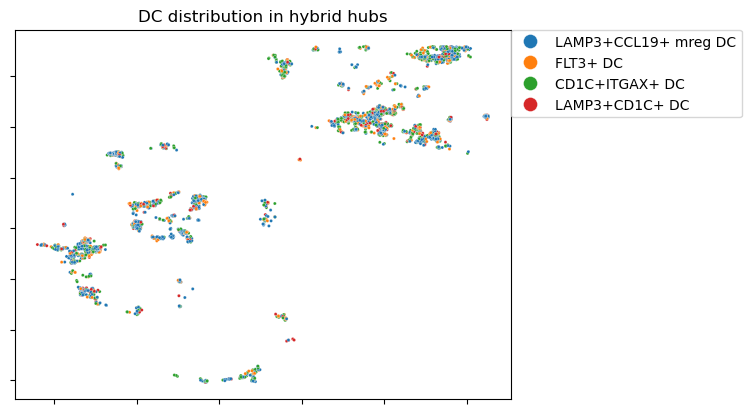

In [135]:
# What are the dendritic cells in the tumor hubs?
# Does one specific type more prevalent than others?
plot_tile(dc[dc['hubType']=='hybrid_hub'], by_type='type_lvl2', title='DC distribution in hybrid hubs', size=5)

<Axes: title={'center': 'DC distribution in tumor hubs'}>

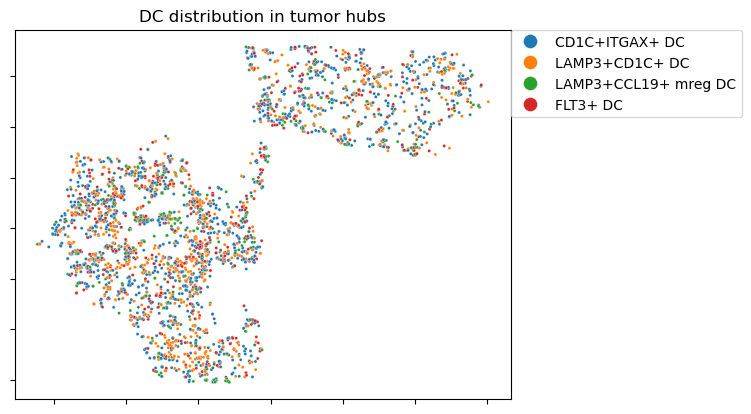

In [136]:
plot_tile(dc[dc['hubType']=='tumor'], by_type='type_lvl2', title='DC distribution in tumor hubs', size=5)

In [ ]:
# Macrophage - where is